In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filedir1 = '/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Data/CMIP5_globalaverages/Forcingpaperdata'

storedata = False # store anomalies in file?
createnewfile = False # if it is the first time this is run, a new file should be created, that can later be loaded
filenameT = 'annualTanom_abrupt4xco2.txt'; filenameN = 'annualNanom_abrupt4xco2.txt'

if createnewfile == True:
    cols = ['year','ACCESS1-0','ACCESS1-3','CanESM2', 'CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GFDL-ESM2G','GFDL-ESM2M','GISS-E2-H','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','IPSL-CM5B-LR','MIROC-ESM','MIROC5','MPI-ESM-LR','MPI-ESM-MR','MRI-CGCM3','NorESM1-M']
    dfT = pd.DataFrame(np.full((150, len(cols)),'-'), columns = cols); dfT['year'] = np.arange(1,151)
    dfN = pd.DataFrame(np.full((150, len(cols)),'-'), columns = cols); dfN['year'] = np.arange(1,151)
    dfT.to_csv(filenameT, sep='\t'); dfN.to_csv(filenameN, sep='\t');

#model = 'ACCESS1-0'
#model = 'ACCESS1-3'
#model = 'CanESM2'
#model = 'CCSM4'
#model = 'CNRM-CM5'
#model = 'CSIRO-Mk3-6-0'
#model = 'GFDL-CM3'
#model = 'GFDL-ESM2G'
#model = 'GFDL-ESM2M'
#model = 'GISS-E2-H'
#model = 'GISS-E2-R'
#model = 'HadGEM2-ES'
#model = 'inmcm4'
#model = 'IPSL-CM5A-LR'
#model = 'IPSL-CM5B-LR'
#model = 'MIROC-ESM'
#model = 'MIROC5'
#model = 'MPI-ESM-LR'
#model = 'MPI-ESM-MR'
#model = 'MRI-CGCM3'
model = 'NorESM1-M'

realm = 'Amon'
ensemble = 'r1i1p1'

## define time periods of data:
if model == 'ACCESS1-0':
    abrupt4xco2timeperiod = '030001-044912' 
    controltimeperiod = '030001-079912'
    control_branch_yr = 300
elif model == 'ACCESS1-3':
    abrupt4xco2timeperiod = '025001-040012' 
    controltimeperiod = '025001-074912'
    control_branch_yr = 250
elif model == 'CanESM2':
    abrupt4xco2timeperiod = '185001-199912'  
    controltimeperiod = '201501-301012'    
    control_branch_yr = 2321
elif model == 'CCSM4':
    abrupt4xco2timeperiod = '185001-200012' 
    controltimeperiod = '025001-130012'
    control_branch_yr = 251 #from http://www.cesm.ucar.edu/CMIP5/errata/branch_times.html
elif model == 'CNRM-CM5':
    abrupt4xco2timeperiod = '185001-199912' 
    controltimeperiod = '185001-269912'
    control_branch_yr = 1850
elif model == 'CSIRO-Mk3-6-0':
    abrupt4xco2timeperiod = '000101-015012' 
    controltimeperiod = '000101-050012'
    control_branch_yr = 104
elif model == 'GFDL-CM3':
    abrupt4xco2timeperiod = '000101-015012' 
    controltimeperiod = '000101-050012'
    control_branch_yr = 1
elif model == 'GFDL-ESM2G' or model == 'GFDL-ESM2M':         
    abrupt4xco2timeperiod = '000101-030012' 
    controltimeperiod = '000101-050012'
    control_branch_yr = 1
elif model == 'GISS-E2-H':
    abrupt4xco2timeperiod = '185001-200012' 
    print(model + 'has control run for two different periods')
    #controltimeperiod = '118001-141912'
    controltimeperiod = '241001-294912'
    control_branch_yr = 2660
    #GISS-E2-H branch time info contains error. Metadata says day 2660 since year 1180-1-1, but they probably mean year 2660.
elif model == 'GISS-E2-R':
    abrupt4xco2timeperiod = '185001-200012'  
    print(model + ' has two different control runs')
    #controltimeperiod = '333101-363012'   
    controltimeperiod1 = '398101-453012' 
    controltimeperiod2 = '398101-920512'
    control_branch_yr = 4200
    #GISS-E2-R branch time info contains error. Metadata says day 4200 since year 3331-1-1, but they probably mean year 4200.
    # Note: The two blocks of years that are present (3331-3630 and 3981-4530) represent different control runs
elif model == 'HadGEM2-ES':
    abrupt4xco2timeperiod = '186001-201012'         
    controltimeperiod = '186001-243511'
    control_branch_yr = 1860 # or actually december 1859, but I ignore this first month in the annual average 
elif model == 'inmcm4': #  the time-coordinate units should read "days after 1851"
    abrupt4xco2timeperiod = '209001-223912' 
    controltimeperiod = '185001-234912'   
    control_branch_yr = 2090
elif model == 'IPSL-CM5A-LR':
    abrupt4xco2timeperiod = '185001-210912' 
    controltimeperiod = '180001-279912'
    control_branch_yr = 1850 # IPSL-CM5A-LR branch time may contain error, and it looks like they mean jan 1850.
elif model == 'IPSL-CM5B-LR':
    abrupt4xco2timeperiod = '185001-200912'     
    controltimeperiod = '183001-212912'   
    control_branch_yr = 1850 # Looks like they mean year 1850 instead of day 1850 since 1830-01-01.
elif model == 'MIROC-ESM':
    abrupt4xco2timeperiod = '000101-015012'     
    controltimeperiod = '180001-242912'  
    control_branch_yr = 1880
elif model == 'MIROC5':
    abrupt4xco2timeperiod = '210001-225012'     
    controltimeperiod = '200001-286912'    
    control_branch_yr = 2100
elif model == 'MPI-ESM-LR':
    abrupt4xco2timeperiod = '185001-199912'    
    controltimeperiod = '185001-284912'    
    control_branch_yr = 1880
elif model == 'MPI-ESM-MR':
    abrupt4xco2timeperiod = '185001-199912'    
    controltimeperiod = '185001-284912'   
    control_branch_yr = 1850
elif model == 'MPI-ESM-P':
    abrupt4xco2timeperiod = '185001-199912'  
    controltimeperiod = '185001-300512'
    control_branch_yr = 1866
elif model == 'MRI-CGCM3':
    abrupt4xco2timeperiod = '185101-200012' 
    controltimeperiod = '185101-235012'
    control_branch_yr = 1891
elif model == 'NorESM1-M':
    abrupt4xco2timeperiod = '000101-015012' 
    controltimeperiod = '070001-120012'
    control_branch_yr = 700


In [2]:
######  load abrupt4xco2 data ###### 
exp = 'abrupt4xco2'

var = 'tas' # temperatures
strings = [var, realm, model, exp, ensemble, abrupt4xco2timeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
temp=datatable.iloc[:,0]

var = 'rlut' # rlut
strings = [var, realm, model, exp, ensemble, abrupt4xco2timeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rlut=datatable.iloc[:,0]

var = 'rsut' # rsut
strings = [var, realm, model, exp, ensemble, abrupt4xco2timeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rsut=datatable.iloc[:,0]

var = 'rsdt' # rsdt
strings = [var, realm, model, exp, ensemble, abrupt4xco2timeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
rsdt=datatable.iloc[:,0]

# use only 150 years of data in this analysis
if len(temp)>150:
    temp = temp[0:150]
    rlut = rlut[0:150]
    rsut = rsut[0:150]
    rsdt = rsdt[0:150]


###### load control run data ###### 
exp = 'piControl'

var = 'tas' # temperatures
if model == 'GISS-E2-R': 
    #controltimeperiod = controltimeperiod1
    controltimeperiod = controltimeperiod2
    
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controltemp=datatable.iloc[:,0]

var = 'rlut' # rlut
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrlut=datatable.iloc[0:len(controltemp),0]

var = 'rsut' # rsut
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrsut=datatable.iloc[0:len(controltemp),0]

var = 'rsdt' # rsdt
strings = [var, realm, model, exp, ensemble, controltimeperiod]
filename = 'glannual_' + "_".join(strings) + '.txt'
file = os.path.join(filedir1, model, exp, filename)
datatable = pd.read_table(file, header=None,sep=" ")
controlrsdt=datatable.iloc[0:len(controltemp),0]

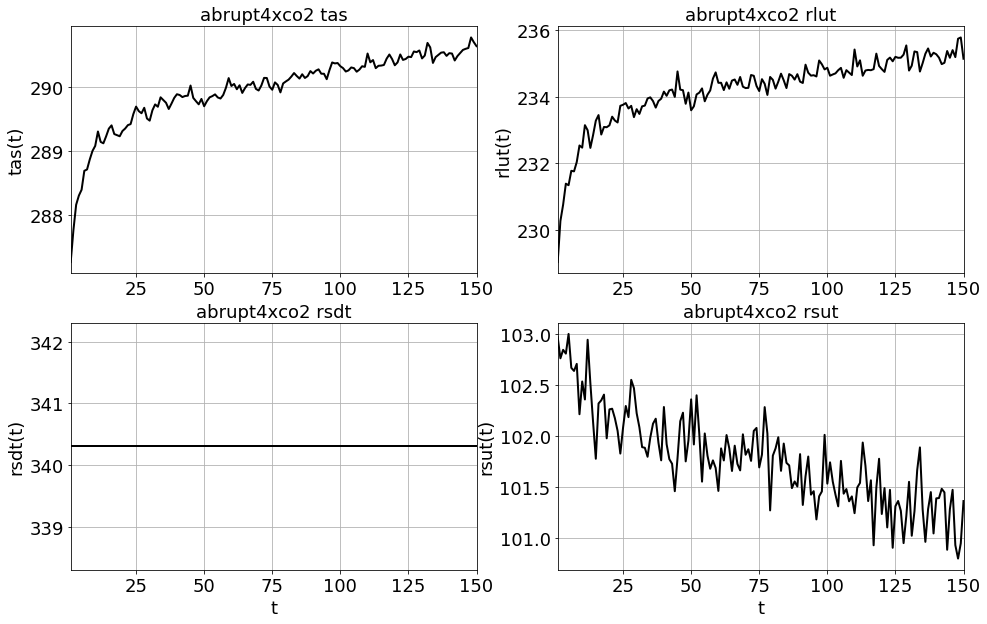

In [3]:
# plot abrupt4xco2 / piControl data
exp = 'abrupt4xco2'
# exp = piControl

years = np.arange(1,150+1)

# create figure
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = [16,10])

# plot temperature
var = temp[:]; label = 'tas'
ax[0,0].plot(years,var,linewidth=2,color = "black")
#ax[0,0].set_xlabel('t',fontsize = 18)
ax[0,0].set_ylabel(label + '(t)',fontsize = 18)
ax[0,0].set_title(exp + ' ' + label,fontsize = 18)
ax[0,0].grid()
ax[0,0].set_xlim(min(years),max(years))
ax[0,0].tick_params(axis='both',labelsize=18)

# plot rlut
var = rlut[:]; label = 'rlut'
ax[0,1].plot(years,var,linewidth=2,color = "black")
#ax[0,1].set_xlabel('t',fontsize = 18)
ax[0,1].set_ylabel(label + '(t)',fontsize = 18)
ax[0,1].set_title(exp + ' ' + label,fontsize = 18)
ax[0,1].grid()
ax[0,1].set_xlim(min(years),max(years))
ax[0,1].tick_params(axis='both',labelsize=18)

# plot rsdt
var = rsdt[:]; label = 'rsdt'
ax[1,0].plot(years,var,linewidth=2,color = "black")
ax[1,0].set_xlabel('t',fontsize = 18)
ax[1,0].set_ylabel(label + '(t)',fontsize = 18)
ax[1,0].set_title(exp + ' ' + label,fontsize = 18)
ax[1,0].grid()
ax[1,0].set_xlim(min(years),max(years))
ax[1,0].set_ylim(var[0]-2,var[0]+2)
ax[1,0].tick_params(axis='both',labelsize=18)

# plot rsut
var = rsut[:]; label = 'rsut'
ax[1,1].plot(years,var,linewidth=2,color = "black")
ax[1,1].set_xlabel('t',fontsize = 18)
ax[1,1].set_ylabel(label + '(t)',fontsize = 18)
ax[1,1].set_title(exp + ' ' + label,fontsize = 18)
ax[1,1].grid()
ax[1,1].set_xlim(min(years),max(years))
ax[1,1].tick_params(axis='both',labelsize=18)

0
-0.0004721481623169282 -0.0009765909347830384 1.1443407530586402e-10 0.00033568243547568293


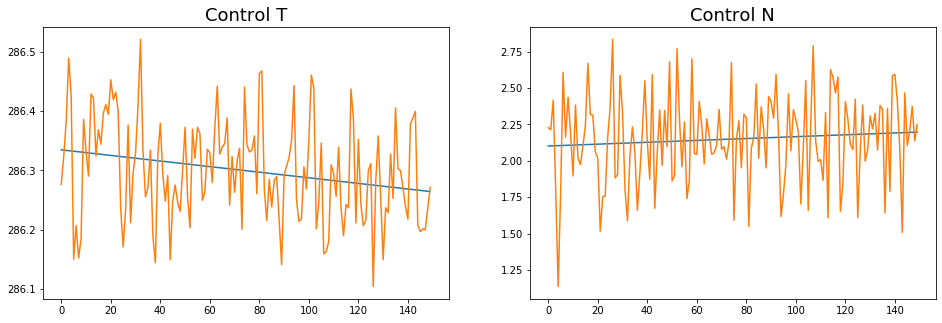

In [4]:
controlyears = np.arange(0,len(controltemp))

nettoarad = rsdt - rsut - rlut
controlnettoarad = controlrsdt - controlrsut - controlrlut

branchindex = control_branch_yr - int(controltimeperiod[0:4])
print(branchindex)


# compute linear trend to each record separately, before computing the anomaly of netTOA:

# find linear fits to control T and nettoarad in the same period:
#p1 = np.polyfit(controlyears, controltemp, deg = 1)
p1 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controltemp[branchindex:(branchindex + len(temp))], deg = 1)
lintrendT = np.polyval(p1,controlyears[branchindex:(branchindex + len(temp))])

#p2 = np.polyfit(controlyears, controlrlut, deg = 1)
p2 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrlut[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rlut = np.polyval(p2,controlyears[branchindex:(branchindex + len(temp))])

#p3 = np.polyfit(controlyears, controlrsdt, deg = 1)
p3 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrsdt[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rsdt = np.polyval(p3,controlyears[branchindex:(branchindex + len(temp))])

#p4 = np.polyfit(controlyears, controlrsut, deg = 1)
p4 = np.polyfit(controlyears[branchindex:(branchindex + len(temp))], controlrsut[branchindex:(branchindex + len(temp))], deg = 1)
lintrend_rsut = np.polyval(p4,controlyears[branchindex:(branchindex + len(temp))])
print(p1[0], p2[0], p3[0], p4[0])

lintrendN = lintrend_rsdt - lintrend_rsut - lintrend_rlut
deltaN = nettoarad - lintrendN
deltaT = temp - lintrendT

# store deltaT and deltaN?
if storedata == True:
    dfT = pd.read_table(filenameT, index_col=0); dfN = pd.read_table(filenameN, index_col=0); # load files
    dfT[model] = deltaT; dfN[model] = deltaN
    dfT.to_csv(filenameT, sep='\t'); dfN.to_csv(filenameN, sep='\t') # save files again

# create figure
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = [16,5])

ax[0,].plot(controlyears[branchindex:(branchindex + len(temp))], lintrendT)
ax[0,].plot(controlyears[branchindex:(branchindex + len(temp))], controltemp[branchindex:(branchindex + len(temp))])
ax[0,].set_title('Control T',fontsize = 18)

ax[1,].plot(controlyears[branchindex:(branchindex + len(temp))], lintrendN)
ax[1,].plot(controlyears[branchindex:(branchindex + len(temp))], controlnettoarad[branchindex:(branchindex + len(temp))])
ax[1,].set_title('Control N',fontsize = 18);


F2xCO2 = 3.1043274965429406
feedback parameter = -1.108875012228765
ECS / T2xCO2 = 2.7995287677223866


(0, 5.599057535444773)

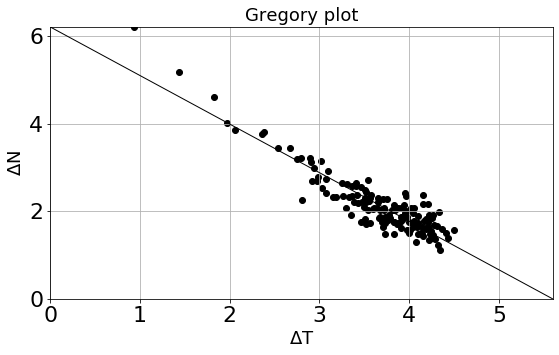

In [5]:
# Gregory plot

fig, ax = plt.subplots(figsize = [9,5]) 
plt.scatter(deltaT,deltaN,linewidth=1,color = "black")
ax.set_xlabel('$\Delta$T',fontsize = 18)
ax.set_ylabel('$\Delta$N',fontsize = 18)
ax.set_title('Gregory plot',fontsize = 18)
ax.grid()
ax.tick_params(axis='both',labelsize=22)  

# find linear fit to these points:
p1 = np.polyfit(deltaT,deltaN,deg = 1) #deltaN = p1[1] + p1[0]*deltaT
print('F2xCO2 = '+ str(p1[1]/2))
print('feedback parameter = ' + str(p1[0]))
print('ECS / T2xCO2 = ' + str(-p1[1]/(2*p1[0])))
#linfit = np.polyval(p1,deltaT)
deltaTextended = np.concatenate(([0],deltaT,[-p1[1]/p1[0]]))
linfit = np.polyval(p1,deltaTextended)
plt.plot(deltaTextended,linfit,linewidth=1,color = "black")
ax.set_ylim(0,p1[1])
ax.set_xlim(0,-p1[1]/(p1[0]))


## Find a fit to deltaT(t) and deltaN(t) for a fixed set of time scales:

### Compute 1000 different fits

In [6]:
from scipy import optimize
import random as rd

N = 1000;
p_lim = 1 - 0.99;

parameters_names = ['tau1', 'tau2', 'tau3', 'tau4', 'a_1', 'a_2', 'a_3', 'a_4', 'b_1', 'b_2', 'b_3', 'b_4', 'F2x', 'T2x','rnorm']
df_par = pd.DataFrame(columns=parameters_names)

# for deltaT we also have the information that deltaT(0) = 0. Include this:
deltaT0 = np.concatenate(([0],deltaT))
years0 = np.concatenate(([0],years))
timepoints = np.arange(0,151)

# loop with different random choices of time scales:
ii = 0
while ii < 1000:
    # the log10 of the time scale will be the random number:
    tau1 = 10**rd.uniform(np.log10(1), np.log10(6)) # range: (1, 6) years
    factor1 = rd.uniform(5,10);
    tau2 = factor1*tau1;
    tau3 = 10**rd.uniform(np.log10(80), np.log10(1000))
    
    # fixed time scales:
    taulist = np.array([tau1, tau2, tau3])
    dim = len(taulist) 
    # compute components T_n(t) = exp(-t/tau_n)*F(t) (Here * is a convolution and F is a constant, so we can compute T_n analytically)
    A = np.zeros((len(years)+1,dim))
    for i in range(0,dim): # compute the predictors in the linear model for deltaT
        A[:,i] = (1 - np.exp((-np.arange(0,151))/taulist[i]))
    
    ########### find parameters a_n in the linear model: deltaT = \sum_i a_n[i]*(1 - np.exp((-t/tau[i])) ###########
    a_n, rnorm1 = optimize.nnls(A,deltaT0) # non-negative least squares, to ensure positive parameters
    Ti = np.array([A[:,i]*a_n[i] for i in range(0,dim)]) # compute components
    Tsum = A@a_n # sum of all components
    
    ########### Next: Estimate the lambda's from a Gregory plot ###########

    # include lines dividing the regions where the different fits will be made
    splits = np.cumsum(a_n)

    # First: Linear fit to the part of Gregory plot dominated by the slowest mode:
    p_lim_index3 = np.int(np.ceil(-tau3*np.log(p_lim)))-1 # -1 because index 0 is year 1
    T3 = deltaT[deltaT>=splits[dim-2]]
    N3 = deltaN[-len(T3):]
    reg_endindex3 = np.min([p_lim_index3 - (len(deltaT)-len(T3)), len(T3)]);
    reg3par = np.polyfit(T3[:reg_endindex3],N3[:reg_endindex3],deg = 1)
    b_4 = reg3par[1] + reg3par[0]*np.sum(a_n) # also equal to lambda3*a_4, and 2*(newF2x - oldF2x)
    lambda3 = - reg3par[0]
    newECS = -reg3par[1]/reg3par[0]/2
    oldECS = sum(a_n)/2
    a_4 = 2*(newECS - oldECS) # extra temperature rise seen in Gregory plot
    #print(newECS*2, sum(a_n) + a_4)
    
    # need to include the "invisible" even longer time scale for this to work:
    tau4 = 5000;
    T4 = a_4*(1 - np.exp(-timepoints/tau4))
    N4 = b_4*np.exp(-timepoints/tau4)
    rnorm2 = np.linalg.norm(Tsum + T4 - deltaT0)
    
    if newECS*2 < np.sum(a_n):
        continue
    elif rnorm2 > rnorm1*1.1:
        continue

    T3ext = np.append(T3, newECS*2);
    linfit3 = np.polyval(reg3par,T3ext)
    
    # Second: Linear fit to part of second "Gregory plot" dominated by intermediate (decadal-scale) mode:
    T_3 = Ti[-1,1:]; N_3 = (lambda3*(a_n[-1] - T_3))
    deltaT2 = deltaT - T_3; deltaN2 = deltaN - N_3 - b_4
    T2 = deltaT2[deltaT2>=splits[dim-3]] 
    N2 = deltaN2[-len(T2):]
    dT2 = splits[dim-2] - T2 # make dT2 a mirror of T2, and starting in 0, just for parameter estimation
    p_lim_index2 = np.int(np.ceil(-tau2*np.log(p_lim)))-1 # -1 because index 0 is year 1
    reg_endindex2 = np.min([p_lim_index2 - (len(deltaT)-len(dT2)), len(dT2)]);
    if reg_endindex2 < 2:
        reg_endindex2 = 3
    
    # this will be a linear model: N2 = slope * dT2 (with no constant term)
    ls_sol2, res, rank, sing_vals = np.linalg.lstsq(np.array([dT2[:reg_endindex2]]).T, np.array([N2[:reg_endindex2]]).T, rcond=None)
    T2ext = np.array([np.concatenate(([splits[0]], T2, [splits[dim-2]]))]).T
    linfit2 = - T2ext@ls_sol2 + splits[dim-2]*ls_sol2[0,0]

    # Third: Linear fit to the part of "Gregory plot" dominated by first mode:
    lambda2 = ls_sol2[0,0]
    T_2 = Ti[-2,1:]; N_2 = (lambda2*(a_n[-2] - T_2))
    deltaT1 = deltaT2 - T_2; deltaN1 = deltaN2 - N_2
    T1 = deltaT1 # use all points
    N1 = deltaN1
    dT1 = splits[0] - T1
    p_lim_index1 = np.int(np.ceil(-tau1*np.log(p_lim)))-1 # -1 because index 0 is year 1
    reg_endindex1 = np.min([p_lim_index1 - (len(deltaT)-len(dT1)), len(dT1)]);
    
    # this will be a linear model: dN2 = slope * dT2 (with no constant term)
    ls_sol1, res, rank, sing_vals = np.linalg.lstsq(np.array([dT1[:reg_endindex1]]).T, np.array([N1[:reg_endindex1]]).T, rcond=None)
    T1ext = np.array([np.concatenate(([0],T1, [splits[0]]))]).T
    linfit1 = - T1ext@ls_sol1 + splits[0]*ls_sol1[0,0]

    # put all estimated lambdas in array, and estimate b_n:
    lambdas = np.array([ls_sol1[0,0], ls_sol2[0,0], - reg3par[0]])
    b_n = lambdas*a_n

    ######### Compute components of N from already estimated paramters: ######### 
    A4 = np.zeros((len(years0),dim))
    for i in range(0,dim): # compute the predictors in the linear model for deltaN  
        A4[:,i] = np.exp((-years0)/taulist[i])    

    Ni = np.array([A4[:,i]*b_n[i] for i in range(0,dim)]) # compute components
    Nsum = A4@b_n # sum of all components   

    # add extra mode, and then extra point in equilibrium:
    Tsum += T4; Tsumext = np.append(Tsum, 2*newECS)
    Nsum += N4; Nsumext = np.append(Nsum, 0)
    newF2x = Nsumext[0]/2
    
    # write results to table
    pars = np.concatenate((taulist, tau4, a_n, a_4, b_n, b_4, newF2x, newECS, rnorm1), axis=None)
    df_par = df_par.append(pd.DataFrame([pars], columns=parameters_names), ignore_index=True)
    ii += 1;

#print(df_par,sep="\n");

In [ ]:
# save file
filename = model + '_1000parameters.txt'

#df_par.to_csv(filename, sep='\t')


## Plot results:

Best estimate:
lambdas:[1.87032028 1.51817517 0.77623303]
New F2x = 3.883326447250455
Temperature only estimate of T2x / ECS = 3.0645832438113194
New estimate of T2x / ECS = 3.1691523255472656



/Users/hege-beatefredriksen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Ordinary Gregory estimates:
F2xCO2 = 3.1043274965429406
feedback parameter = -1.108875012228765
ECS / T2xCO2 = 2.7995287677223866


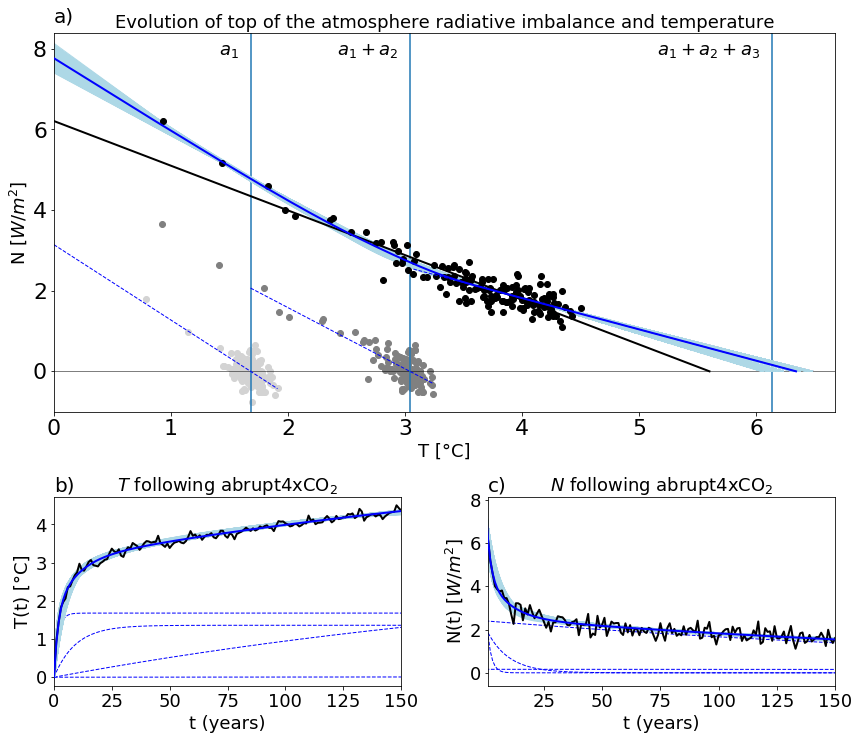

In [7]:
# load file
filename = model + '_1000parameters.txt'
df_par = pd.read_table(filename,index_col=0)
N = len(df_par)
p_lim = 1 - 0.99;

deltaT0 = np.concatenate(([0],deltaT))
years0 = np.concatenate(([0],years))
timepoints = np.arange(0,151)

fig = plt.figure(figsize = [14,12]);
import matplotlib.gridspec as gridspec
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [2, 1],  hspace = 0.3) 
#make nested gridspecs
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0], hspace = 0.1)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[1], wspace = 0.25)

Gax = fig.add_subplot(gs1[0])
Tax = fig.add_subplot(gs2[0])
Nax = fig.add_subplot(gs2[1])

# find maximum values that need to be plotted
T2x_max = np.max(df_par.loc[:,'T2x'])
F2x_max = np.max(df_par.loc[:,'F2x'])

Gax.set_xlabel('T [°C]',fontsize = 18)
Gax.set_ylabel('N [$W/m^2$]',fontsize = 18)
Gax.set_title('Evolution of top of the atmosphere radiative imbalance and temperature',fontsize = 18)
Gax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
Gax.set_xlim([0, 2*T2x_max*1.03])
Gax.set_ylim([-1, 2*F2x_max*1.03])
Gax.tick_params(axis='both',labelsize=22)  

# create figure
Tax.set_xlabel('t (years)',fontsize = 18)
Tax.set_ylabel('T(t) [°C]',fontsize = 18)
Tax.set_title('$T$ following abrupt4xCO$_2$',fontsize = 18)
Tax.set_xlim(min(years0),max(years0))
Tax.tick_params(axis='both',labelsize=18)

# plot control net TOA rad
Nax.set_xlabel('t (years)',fontsize = 18)
Nax.set_ylabel('N(t) [$W/m^2$]',fontsize = 18)
Nax.set_title('$N$ following abrupt4xCO$_2$',fontsize = 18)
Nax.set_xlim(min(years),max(years))
Nax.set_ylim(-0.6,2*F2x_max)
Nax.tick_params(axis='both',labelsize=18)

best_rnorm = np.min(df_par['rnorm']);
for ii in range(N):
    # load parameters from dataframe:
    taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
    a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
    b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
    F2x = df_par.loc[ii,'F2x']
    T2x = df_par.loc[ii,'T2x']
    rnorm = df_par.loc[ii,'rnorm']
    
    dim = len(taulist) 
    ######### compute components of T from already estimated parameters: #########
    A = np.zeros((len(years)+1,dim))
    for i in range(0,dim): # compute the predictors in the linear model for deltaT
        A[:,i] = (1 - np.exp((-np.arange(0,151))/taulist[i]))
    Ti = np.array([A[:,i]*a_n[i] for i in range(0,dim)]) # compute components
    Tsum = A@a_n # sum of all components
    
    ######### Compute components of N from already estimated paramters: ######### 
    A4 = np.zeros((len(years0),dim))
    for i in range(0,dim): # compute the predictors in the linear model for deltaN  
        A4[:,i] = np.exp((-years0)/taulist[i])    
    Ni = np.array([A4[:,i]*b_n[i] for i in range(0,dim)]) # compute components
    Nsum = A4@b_n # sum of all components   

    # add extra point in equilibrium:
    Tsumext = np.append(Tsum, 2*T2x)
    Nsumext = np.append(Nsum, 0)
    
    Gax.plot(Tsumext,Nsumext,linewidth=1,color = "lightblue");
    Tax.plot(years0,Tsum,linewidth=2,color = "lightblue")
    Nax.plot(years0,Nsum,linewidth=2,color = "lightblue")
    
    if rnorm == best_rnorm:
        print('Best estimate:')
        splits = np.cumsum(a_n[:dim-1])
        for splitline in splits:
            Gax.axvline(x=splitline)
        #Gax.text(splits[0]-0.2, 2*F2x+0.2, '$a_1$', fontsize = 14)
        #Gax.text(splits[1]-0.5, 2*F2x+0.2, '$a_1 + a_2$', fontsize = 14)
        #Gax.text(splits[2]-0.8, 2*F2x+0.2, '$a_1 + a_2 + a_3$', fontsize = 14)
        #Gax.text(splits[0]*0.88, 2*F2x+0.2, '$a_1$', fontsize = 14)
        #Gax.text(splits[1]*0.81, 2*F2x+0.2, '$a_1 + a_2$', fontsize = 14)
        #Gax.text(splits[2]*0.86, 2*F2x+0.2, '$a_1 + a_2 + a_3$', fontsize = 14)
        Gax.text(splits[0]-0.1, 2*F2x_max-0.3, '$a_1$', fontsize = 18, horizontalalignment='right')
        if model != 'GFDL-ESM2G':
            if model == 'GISS-E2-R':
                Gax.text(splits[1]+0.1, 2*F2x_max-0.3, '$a_1 + a_2$', fontsize = 18, horizontalalignment='left')
                Nax.set_ylim(-0.6,9.9)
            elif model == 'MIROC5':
                Gax.text(splits[1]-0.17, 2*F2x_max-0.6, '$a_1 + a_2$', fontsize = 18, horizontalalignment='left')
            else:
                Gax.text(splits[1]-0.1, 2*F2x_max-0.3, '$a_1 + a_2$', fontsize = 18, horizontalalignment='right')
    
        Gax.text(splits[2]-0.1, 2*F2x_max-0.3, '$a_1 + a_2 + a_3$', fontsize = 18, horizontalalignment='right')
        
        # recompute a few things to be plotted only for the best fit:
        b_4 = b_n[-1]; a_n = a_n[0:dim-1]; b_n = b_n[0:dim-1]; dim = dim - 1; # change to same notation as in estimation (except for Ti)
        tau1 = taulist[0]; tau2 = taulist[1]; tau3 = taulist[2]
        
        # First: Linear fit to the part of Gregory plot dominated by the slowest mode:
        p_lim_index3 = np.int(np.ceil(-tau3*np.log(p_lim)))-1 # -1 because index 0 is year 1
        T3 = deltaT[deltaT>=splits[dim-2]]
        N3 = deltaN[-len(T3):]
        reg_endindex3 = np.min([p_lim_index3 - (len(deltaT)-len(T3)), len(T3)]);
        reg3par = np.polyfit(T3[:reg_endindex3],N3[:reg_endindex3],deg = 1)
        T3ext = np.sort(np.append(T3, T2x*2));
        linfit3 = np.polyval(reg3par,T3ext)
        
        # Second: Linear fit to part of second "Gregory plot" dominated by intermediate (decadal-scale) mode:
        T_3 = Ti[2,1:]; N_3 = (- reg3par[0]*(a_n[-1] - T_3))
        deltaT2 = deltaT - T_3; deltaN2 = deltaN - N_3 - b_4
        T2 = deltaT2[deltaT2>=splits[dim-3]] 
        N2 = deltaN2[-len(T2):]
        dT2 = splits[dim-2] - T2 # make dT2 a mirror of T2, and starting in 0, just for parameter estimation
        p_lim_index2 = np.int(np.ceil(-tau2*np.log(p_lim)))-1 # -1 because index 0 is year 1
        reg_endindex2 = np.min([p_lim_index2 - (len(deltaT)-len(dT2)), len(dT2)]);
        if reg_endindex2 < 3:
            reg_endindex2 = 3 # make sure we still use at least 3 points

        # this will be a linear model: N2 = slope * dT2 (with no constant term)
        ls_sol2, res, rank, sing_vals = np.linalg.lstsq(np.array([dT2[:reg_endindex2]]).T, np.array([N2[:reg_endindex2]]).T, rcond=None)
        T2ext = np.array(np.sort([np.concatenate(([splits[0]], T2, [splits[dim-2]]))])).T
        linfit2 = - T2ext@ls_sol2 + splits[dim-2]*ls_sol2[0,0]
        
        # Third: Linear fit to the part of "Gregory plot" dominated by first mode:
        lambda2 = ls_sol2[0,0]
        T_2 = Ti[1,1:]; N_2 = (lambda2*(a_n[-2] - T_2))
        deltaT1 = deltaT2 - T_2; deltaN1 = deltaN2 - N_2
        T1 = deltaT1 # use all points
        N1 = deltaN1
        dT1 = splits[0] - T1
        p_lim_index1 = np.int(np.ceil(-tau1*np.log(p_lim)))-1 # -1 because index 0 is year 1
        reg_endindex1 = np.min([p_lim_index1 - (len(deltaT)-len(dT1)), len(dT1)]);

        # this will be a linear model: dN2 = slope * dT2 (with no constant term)
        ls_sol1, res, rank, sing_vals = np.linalg.lstsq(np.array([dT1[:reg_endindex1]]).T, np.array([N1[:reg_endindex1]]).T, rcond=None)
        T1ext = np.array(np.sort([np.concatenate(([0],T1, [splits[0]]))])).T
        linfit1 = - T1ext@ls_sol1 + splits[0]*ls_sol1[0,0]
        
            
        # linear fits shown as dashed blue curves, and gray dots that are used to compute the fit:
        Gax.plot(T3ext, linfit3, '--', linewidth=1, color = "blue",zorder=1000)
        Gax.scatter(deltaT2,deltaN2,linewidth=1,color = "gray")
        if a_n[1]>0:
            Gax.plot(T2ext, linfit2, '--', linewidth=1, color = "blue")
        Gax.scatter(deltaT1,deltaN1,linewidth=1,color = "lightgray")
        Gax.plot(T1ext, linfit1, '--', linewidth=1, color = "blue")
        
        Gax.plot(Tsumext,Nsumext,linewidth=2,color = "blue",zorder=1000);
        Tax.plot(years0,Tsum,linewidth=2,color = "blue",zorder=1000)
        Nax.plot(years0,Nsum,linewidth=2,color = "blue",zorder=1000)
        
        Gax.scatter(deltaT,deltaN,linewidth=1,color = "black",zorder=999)
        Tax.plot(years0,deltaT0,linewidth=2,color = "black",zorder=999)
        Nax.plot(years,deltaN,linewidth=2,color = "black",zorder=999)
        
        # plot components of best fit:
        for i in range(0,dim+1):
            Tax.plot(years0,Ti[i,:],'--',linewidth=1,color = "blue")
            Nax.plot(years0,Ni[i,:],'--',linewidth=1,color = "blue")
            
        lambdas = b_n/a_n
        print('lambdas:' + str(lambdas))
        print('New F2x = ' + str(F2x))
        print('Temperature only estimate of T2x / ECS = ' + str(np.sum(a_n[:dim])/2))
        print('New estimate of T2x / ECS = ' + str(T2x) + '\n')
        
        # compute also parameters using ordinary Gregory method:
        p1 = np.polyfit(deltaT,deltaN,deg = 1)
        deltaTextended = np.concatenate(([0],deltaT,[-p1[1]/p1[0]]))
        linfit = np.polyval(p1,deltaTextended)
        GregoryF2x = p1[1]/2; GregoryT2x = -p1[1]/(2*p1[0])
        
        # put results in pandas dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        columnnames = ['tau1', 'tau2', 'tau3', 'tau4', 'a_1', 'a_2', 'a_3', 'a_4', 'b_1', 'b_2', 'b_3', 'b_4', 'F2x', 'T2x', 'GregoryF2x', 'GregoryT2x'];
        dataframe = pd.DataFrame([np.concatenate((taulist, a_n, b_n, F2x, T2x, GregoryF2x, GregoryT2x), axis=None)], index = [model], columns=columnnames)

        # if file is not already created, create a new file to store the results in:
        filename = 'best_estimated_parameters.txt'
        #dataframe.to_csv(filename, sep='\t')
        
        # if file exists already, load instead exising file and append results: 
        loaded_dataframe = pd.read_table(filename,index_col=0)
        if (loaded_dataframe.index == model).any():
            loaded_dataframe = loaded_dataframe.drop([model]) # if model already has a row that we want to remove
        loaded_dataframe = loaded_dataframe.append(dataframe)

        # write them to a file:
        #loaded_dataframe.to_csv(filename, sep='\t')


Gax.plot(deltaTextended,linfit,linewidth=2,color = "black");
print('Ordinary Gregory estimates:')
print('F2xCO2 = '+ str(GregoryF2x))
print('feedback parameter = ' + str(p1[0]))
print('ECS / T2xCO2 = ' + str(GregoryT2x))
        
# include a), b), c):
Gax.text(0,1.03,'a)',transform=Gax.transAxes, fontsize=20)
Tax.text(0,1.03,'b)',transform=Tax.transAxes, fontsize=20)
Nax.text(0,1.03,'c)',transform=Nax.transAxes, fontsize=20);

#plt.savefig('/Users/hege-beatefredriksen/OneDrive - UiT Office 365/Papers/Forcingpaper/Figures/' + model + '_gregory_linresponses.pdf', format='pdf', dpi=600, bbox_inches="tight")
# if second mode has zero amplitude (a_n[1]==0), then remove this mode from linear model
